## Recommender System for Crops 

In this notebook, I am developing a recommender system for crops based on soil ph using python for our project.Here, we are suggesting crops that are most similar to a particular crop.For instance, Potato is a crop which can be grown under different soil ph level, so we are trying to suggest crops that are similar to potato to different suburbs in Gippsland.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Reading required files 

In [2]:
soil_df = pd.read_csv("soil_new.csv")
crop_df = pd.read_csv("crop_data.csv")

In [3]:
#viewing first few data for soil dataset
soil_df.head()

,Suburbs,Post Code,soil_type,geology,dominant soil,soil_ph
0,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1
1,Agnes,3962,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",5.9
2,Allambee,3823,Yarragon,Pleistocene (late) sediments,Brown Dermosols and Hydrosols,6.2
3,Almurta,3979,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",5.9
4,Anderson,3995,Leongatha Sth,Tertiary sediments,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.0


In [4]:
#viewing first few rows of crops dataset
crop_df.head()

,soil_ph,crops
0,6.0,Cucumber
1,6.1,Cucumber
2,6.2,Cucumber
3,6.3,Cucumber
4,6.4,Cucumber


In [5]:
#Merging two datasets considering soil ph as the key
soil_df = pd.merge(soil_df, crop_df, on='soil_ph')

In [6]:
soil_df.head()

,Suburbs,Post Code,soil_type,geology,dominant soil,soil_ph,crops
0,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1,Cucumber
1,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1,Tomato
2,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1,Potato
3,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1,Eggplant
4,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1,Rice


#### Exploratory Data Analysis

Let's create a dataframe with average soil ph and total soil ph with respect to crops.

In [7]:
soil_df.groupby('crops')['soil_ph'].mean().sort_values(ascending=False).head()   #mean of soil ph

crops
Carrot      6.200000
Zucchini    6.143750
Cucumber    6.143750
Tomato      6.116129
Rice        6.116129
Name: soil_ph, dtype: float64

In [8]:
soil_df.groupby('crops')['soil_ph'].count().sort_values(ascending=False).head() # total count

crops
Potato      98
Eggplant    98
Celery      63
Oats        60
Zucchini    32
Name: soil_ph, dtype: int64

Now create a dataframe with mean and total count of soil ph 

In [9]:
soil_ph = pd.DataFrame(soil_df.groupby('crops')['soil_ph'].mean())

In [10]:
soil_ph

,soil_ph
crops,
Carrot,6.200000
Celery,6.004762
Cucumber,6.143750
Eggplant,5.847959
Oats,4.768333
Potato,5.847959
Rice,6.116129
Tomato,6.116129
Zucchini,6.143750


In [11]:
soil_ph['number_soil_ph'] = pd.DataFrame(soil_df.groupby('crops')['soil_ph'].count())

In [12]:
soil_ph

,soil_ph,number_soil_ph
crops,,
Carrot,6.200000,9
Celery,6.004762,63
Cucumber,6.143750,32
Eggplant,5.847959,98
Oats,4.768333,60
Potato,5.847959,98
Rice,6.116129,31
Tomato,6.116129,31
Zucchini,6.143750,32


Now let's plot some histograms for the above dataframe

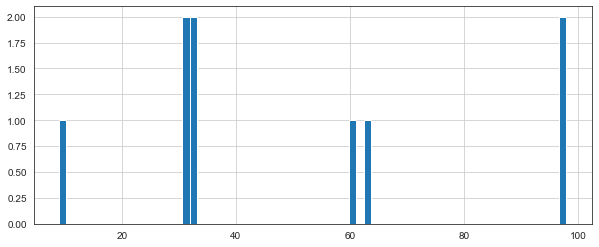

In [13]:
#histogram for total soil ph values
plt.figure(figsize=(10, 4))
soil_ph['number_soil_ph'].hist(bins=70)

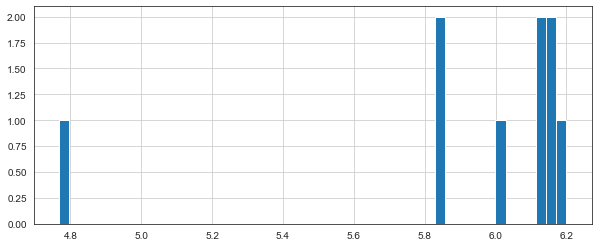

In [14]:
#histogram for average soil ph values
plt.figure(figsize=(10, 4))
soil_ph['soil_ph'].hist(bins=50)

#### Recommending crops 

Now let's create a matrix that has the suburbs on one axis and crops on another axis.Each cell will then consist of the values of soil ph and there will be a lot of NaN values as the most of the crops are not suitable for all of the suburbs.

In [15]:
#creating a table
crop_rec = soil_df.pivot_table(index = 'Suburbs', columns = 'crops', values = 'soil_ph')

In [16]:
crop_rec.head()

crops,Carrot,Celery,Cucumber,Eggplant,Oats,Potato,Rice,Tomato,Zucchini
Suburbs,,,,,,,,,
Aberfeldy,NaN,6.1,6.1,6.1,NaN,6.1,6.1,6.1,6.1
Agnes,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN
Allambee,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2
Almurta,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [17]:
crop_rec.reset_index(level=0, inplace=True)

In [18]:
crop_rec

crops,Suburbs,Carrot,Celery,Cucumber,Eggplant,Oats,Potato,Rice,Tomato,Zucchini
0,Aberfeldy,NaN,6.1,6.1,6.1,NaN,6.1,6.1,6.1,6.1
1,Agnes,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN
2,Allambee,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2
3,Almurta,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN
4,Anderson,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
152,Yallourn North,NaN,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN
153,Yanakie,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN
154,Yarragon,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2
155,Yinnar,NaN,NaN,NaN,5.5,NaN,5.5,NaN,NaN,NaN


In [19]:
#sorting the values of soil ph in descending order
soil_ph.sort_values('number_soil_ph', ascending=False)

,soil_ph,number_soil_ph
crops,,
Eggplant,5.847959,98
Potato,5.847959,98
Celery,6.004762,63
Oats,4.768333,60
Cucumber,6.143750,32
Zucchini,6.143750,32
Rice,6.116129,31
Tomato,6.116129,31
Carrot,6.200000,9


#### Finding correlation of potato with other crops 

In [20]:
#Taking soil ph of each suburb for potato
potato_suburb_soil_ph = crop_rec['Potato']
potato_suburb_soil_ph.head()

0    6.1
1    5.9
2    6.2
3    5.9
4    NaN
Name: Potato, dtype: float64

In [21]:
#Uisng corrwith() method to get correlation of other crops with potato
similar_to_potato = crop_rec.corrwith(potato_suburb_soil_ph)

In [22]:
similar_to_potato

crops
Carrot      NaN
Celery      1.0
Cucumber    1.0
Eggplant    1.0
Oats        NaN
Potato      1.0
Rice        1.0
Tomato      1.0
Zucchini    1.0
dtype: float64

In [23]:
#removing NaN values and using a DataFrame instead of a series
corr_potato = pd.DataFrame(similar_to_potato, columns=['Correlation'])
corr_potato.dropna(inplace = True)

In [24]:
corr_potato

,Correlation
crops,
Celery,1.0
Cucumber,1.0
Eggplant,1.0
Potato,1.0
Rice,1.0
Tomato,1.0
Zucchini,1.0


In [25]:
#Add the corresponding soil ph count 
corr_potato = corr_potato.join(soil_ph['number_soil_ph'])

In [26]:
corr_potato

,Correlation,number_soil_ph
crops,,
Celery,1.0,63
Cucumber,1.0,32
Eggplant,1.0,98
Potato,1.0,98
Rice,1.0,31
Tomato,1.0,31
Zucchini,1.0,32


Now sort the values by filtering out the crops that have less than 10 count of soil ph. 

In [27]:
corr_potato = corr_potato[corr_potato['number_soil_ph']>10].sort_values('Correlation', ascending = False)

In [28]:
#converting index of the above dataframe into list 
crops_new = corr_potato.index.values.tolist()

In [29]:
#function to convert list into string
def listToStringWithoutBrackets(crops_new):
    return str(crops_new).replace('[','').replace(']','')

In [30]:
crops_new = listToStringWithoutBrackets(crops_new)

In [31]:
crops_new

"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomato', 'Cucumber', 'Zucchini'"

In [32]:
# print(crop_rec.loc[(crop_rec.Oats.notnull()), 'Suburbs'])

In [33]:
#Now add the obtained similar crops for potato
for index in crop_rec.index:
    crop_rec.loc[(crop_rec.Potato.notnull()), 'new'] = crops_new
    

There are less than 20 suburbs with ph value less than 5.5 and we have only one crop that can be grown in the ph value less than 5.5 (Oats) and there is no similar crops.Hence, we are adding the crop into the corresponding sububrs as shown below:


In [34]:
#For suburbs less than 5.5 ph value
for index in crop_rec.index:
    crop_rec.loc[(crop_rec.Oats.notnull()), 'new'] = 'Oats'
    

In [35]:
for index in crop_rec.index:
    crop_rec.loc[(crop_rec.Carrot.notnull()), 'new'] = crops_new + ", " + "Carrot"
    

In [36]:
crop_rec

crops,Suburbs,Carrot,Celery,Cucumber,Eggplant,Oats,Potato,Rice,Tomato,Zucchini,new
0,Aberfeldy,NaN,6.1,6.1,6.1,NaN,6.1,6.1,6.1,6.1,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
1,Agnes,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
2,Allambee,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
3,Almurta,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
4,Anderson,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,Oats
...,...,...,...,...,...,...,...,...,...,...,...
152,Yallourn North,NaN,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,Oats
153,Yanakie,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
154,Yarragon,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
155,Yinnar,NaN,NaN,NaN,5.5,NaN,5.5,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."


In [37]:
#reading soil file
df = pd.read_csv("soil_new.csv")

In [38]:
df.head()

,Suburbs,Post Code,soil_type,geology,dominant soil,soil_ph
0,Aberfeldy,3825,Warragul with Silver Creek,Tertiary Basalts & Tertiary sediments,Brown and Yellow Kandosols or Dermosols,6.1
1,Agnes,3962,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",5.9
2,Allambee,3823,Yarragon,Pleistocene (late) sediments,Brown Dermosols and Hydrosols,6.2
3,Almurta,3979,Strzelecki,Cretaceous sediments,"Acidic Grey, Yellow and Brown Dermosols",5.9
4,Anderson,3995,Leongatha Sth,Tertiary sediments,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.0


In [39]:
#creating a dataframe to store the recommended crops and other details
recommended_crops = pd.DataFrame(columns=['Suburbs','PostCode', 'Soil Type', 'Dominant Soils', 'Soil PH', 'Crops'])

In [40]:
recommended_crops

,Suburbs,PostCode,Soil Type,Dominant Soils,Soil PH,Crops


In [41]:
#Adding similar values into the recommended dataframe
recommended_crops['Suburbs'] = df['Suburbs']
recommended_crops['PostCode'] = df['Post Code']
recommended_crops['Soil Type'] = df['soil_type']
recommended_crops['Dominant Soils'] = df['dominant soil']
recommended_crops['Soil PH'] = df['soil_ph']



In [42]:
recommended_crops.head()

,Suburbs,PostCode,Soil Type,Dominant Soils,Soil PH,Crops
0,Aberfeldy,3825,Warragul with Silver Creek,Brown and Yellow Kandosols or Dermosols,6.1,NaN
1,Agnes,3962,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,NaN
2,Allambee,3823,Yarragon,Brown Dermosols and Hydrosols,6.2,NaN
3,Almurta,3979,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,NaN
4,Anderson,3995,Leongatha Sth,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.0,NaN


In [43]:
#merging two datasets to obtain the crops that are correlated to each other
recommended_crops = pd.merge(recommended_crops, crop_rec, on="Suburbs")

In [44]:
recommended_crops

,Suburbs,PostCode,Soil Type,Dominant Soils,Soil PH,Crops,Carrot,Celery,Cucumber,Eggplant,Oats,Potato,Rice,Tomato,Zucchini,new
0,Aberfeldy,3825,Warragul with Silver Creek,Brown and Yellow Kandosols or Dermosols,6.1,NaN,NaN,6.1,6.1,6.1,NaN,6.1,6.1,6.1,6.1,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
1,Agnes,3962,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,NaN,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
2,Allambee,3823,Yarragon,Brown Dermosols and Hydrosols,6.2,NaN,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
3,Almurta,3979,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,NaN,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
4,Anderson,3995,Leongatha Sth,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,Oats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Yallourn North,3825,Inverloch,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.3,NaN,NaN,NaN,NaN,NaN,5.3,NaN,NaN,NaN,NaN,Oats
154,Yanakie,3960,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,NaN,NaN,5.9,NaN,5.9,NaN,5.9,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
155,Yarragon,3823,Yarragon,Brown Dermosols and Hydrosols,6.2,NaN,6.2,6.2,6.2,6.2,NaN,6.2,6.2,6.2,6.2,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
156,Yinnar,3869,Boolarra with Morwell,Acidic Yellow and Grey Dermosols & Kurosols/Ac...,5.5,NaN,NaN,NaN,NaN,5.5,NaN,5.5,NaN,NaN,NaN,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."


#### Dropping unwanted columns 

In [46]:
recommended_crops=recommended_crops.drop(['Carrot', 'Carrot','Rice', 'Celery', 'Cucumber', 'Eggplant', 'Oats', 'Potato', 'Tomato', 'Zucchini'], axis = 1)

In [47]:
recommended_crops['Crops'] = recommended_crops['new']

In [48]:
recommended_crops =recommended_crops.drop(['new'], axis = 1)

In [49]:
recommended_crops.head()

,Suburbs,PostCode,Soil Type,Dominant Soils,Soil PH,Crops
0,Aberfeldy,3825,Warragul with Silver Creek,Brown and Yellow Kandosols or Dermosols,6.1,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
1,Agnes,3962,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
2,Allambee,3823,Yarragon,Brown Dermosols and Hydrosols,6.2,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
3,Almurta,3979,Strzelecki,"Acidic Grey, Yellow and Brown Dermosols",5.9,"'Celery', 'Eggplant', 'Potato', 'Rice', 'Tomat..."
4,Anderson,3995,Leongatha Sth,"Humose-Acidic, Dermosolic, Redoxic HYDROSOL",5.0,Oats


#### Writing into a csv file 

In [50]:
recommended_crops.to_csv('recommendation.csv', index=False)